#Dependencies

In [ ]:

!pip install networkx
!pip install pyranges

     |████████████████████████████████| 685 kB 14.5 MB/s 
     |████████████████████████████████| 470 kB 45.5 MB/s 
     |████████████████████████████████| 1.2 MB 38.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 400 kB 64.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyranges: filename=pyranges-0.0.115-py3-none-any.whl size=695218 sha256=ffae50b8722c943415167e75d0eea275e823c94344027d11ac3082c74cfffcba
  Stored in directory: /root/.cache/pip/wheels/95/79/87/d437d01cb8fd2cb20c872ee402e35ffd61d8162abc0173e488
  Created wheel for ncls: filename=ncls-0.0.64-cp37-cp37m-linux_x86_64.whl size=1740810 sha256=8484a2497c6a748aedade21aca82a477c5caeeb46ff50a4862d9cdfaa56b688e
  Stored in directory: /root/.cache/pip/wheels/79/26/09/fcf1ec1ec33026b62d283e507e55a1059f4e

In [ ]:
from google.colab import files
from IPython.display import SVG, display, Image
from math import *
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import itertools
import networkx as nx
import pyranges as pr

In [ ]:
#Loading each dataframe for each cell type/tissue 
df_GM = pd.read_csv("GM12878.PositivePredictions.txt", sep='\t')
df_K562 = pd.read_csv("K562.PositivePredictions.txt", sep='\t')
df_LNCAP = pd.read_csv("LNCAP.PositivePredictions.txt", sep='\t')
df_NCCIT = pd.read_csv("NCCIT.PositivePredictions.txt", sep='\t')
df_liver = pd.read_csv("liver.PositivePredictions.txt", sep='\t')
df_mESC = pd.read_csv("mESC.PositivePredictions.txt", sep='\t')


NAME_DF = {'df_GM':0,
           'df_K562':1,
           'df_LNCAP':2,
           'df_NCCIT':3,
           'df_liver':4,
           'df_mESC':5}



In [ ]:
df_GM.shape

(36904, 9)

#Finding CRHs

##Looking for CRHs
Let's have a look at an example of a CRH 

In [ ]:
## DATA CLEANING

LS_DF = [df_GM,df_K562,df_LNCAP,df_NCCIT,df_liver,df_mESC] #Joining the dataframes together 

def concat_enhancer(row):
  return row.chr + '-' + str(row.start) + '-' + str(row.end)

for df in LS_DF:
  df.drop(df.loc[df.chr == 'chrX'].index,inplace = True) #we don't need the chrX
  df['enhancer'] = df.apply(concat_enhancer, axis = 'columns') # Concate the 3 columns related to the enhancer together
  df.drop(['chr','start','end','activity','hic_contact', 'ABC_Score'],axis = 1, inplace = True) #dropping useless column

In [ ]:
from warnings import filterwarnings
def draw (g, is_saving = False):
  plt.figure(figsize=(8, 8))
  pos = nx.spring_layout(g, k = 0.8,iterations=100)
  nodes_gene = [node for node in g.nodes if 'chr' not in node]
  nodes_enhancer = [node for node in g.nodes if 'chr' in node]
  labels = dict(zip([node for node in nodes_gene],['$' + node + '$' for node in nodes_gene]))
  nx.draw_networkx_nodes(g, pos, nodelist = nodes_enhancer, node_color='blue', node_size = 100, label = 'Enhancer')
  nx.draw_networkx_nodes(g, pos, nodelist = nodes_gene, node_color='orange', node_size = 350, label = 'Gene promoteur')
  plt.legend(scatterpoints = 1,frameon=False)
  plt.axis("off")
  nx.draw_networkx_edges(g,pos, width=1, edge_color="#cccccc")
  nx.draw_networkx_labels(g,pos, labels)
  if is_saving:
    plt.savefig('CRH.png', transparent=True)

  
def draw_multiple(S, number,is_saving = False):
  fig,axes =plt.subplots(ceil(number/4),4, figsize = (20,10))
  ax = axes.flatten()
  for i in range(number):
    pos = nx.spring_layout(S[i], k = 0.8,iterations=100)
    nodes_gene = [node for node in S[i].nodes if 'chr' not in node]
    nodes_enhancer = [node for node in S[i].nodes if 'chr' in node]
    #labels = dict(zip([node for node in nodes_gene],['$' + node + '$' for node in nodes_gene]))
    nx.draw_networkx_nodes(S[i], pos, nodelist = nodes_enhancer, node_color='blue', node_size = 50, label = 'Enhancer',ax=ax[i])
    nx.draw_networkx_nodes(S[i], pos, nodelist = nodes_gene, node_color='orange', node_size = 200, label = 'Gene promoteur',ax=ax[i])
    nx.draw_networkx_edges(S[i],pos, width=1, edge_color="#cccccc",ax=ax[i])
    #nx.draw_networkx_labels(S[i],pos, labels,ax=ax[i])
    ax[i].axis("off")
  ax[1].legend(scatterpoints = 1,frameon=False)
  if is_saving:
    fig.savefig('CRH.png', transparent=True)

In [ ]:
G=nx.from_pandas_edgelist(LS_DF[NAME_DF['df_GM']], 'TargetGene', 'enhancer',
                          edge_attr=None, create_using=None)

S = [G.subgraph(c).copy() for c in nx.connected_components(G)]


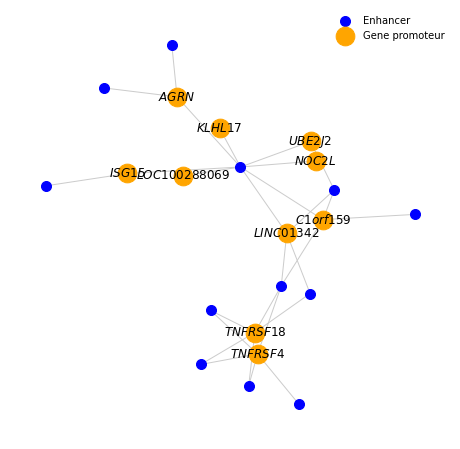

In [ ]:
draw(S[0],True)

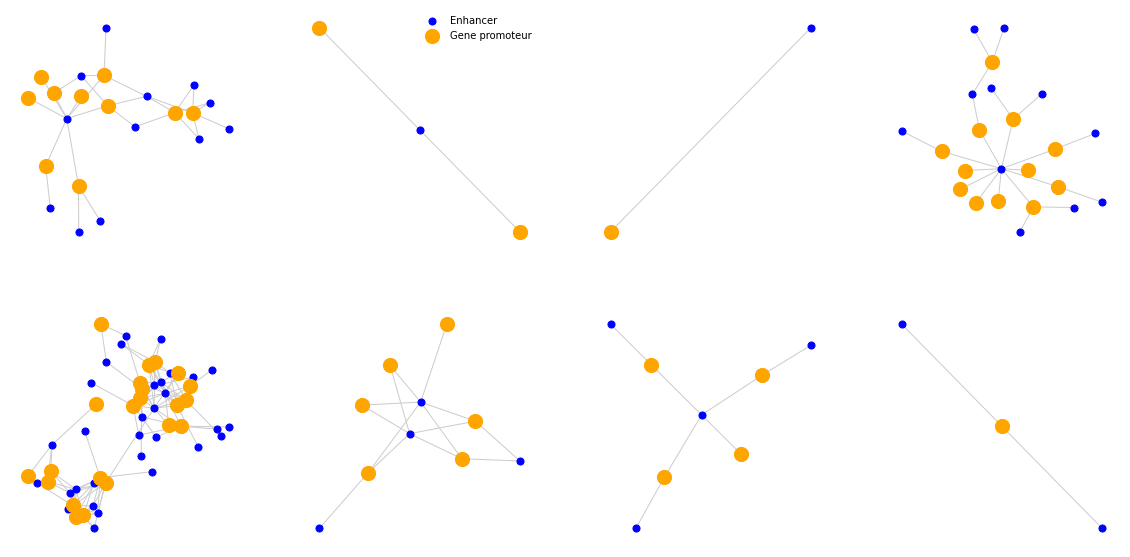

In [ ]:
draw_multiple(S,8, True)

## Looking for common CRH 

In [ ]:
## DATA CLEANING
#suppress chrx 
df_GM.drop(df_GM.loc[df_GM.chr == 'chrX'].index,inplace = True)
df_K562.drop(df_K562.loc[df_K562.chr == 'chrX'].index,inplace = True)
df_LNCAP.drop(df_LNCAP.loc[df_LNCAP.chr == 'chrX'].index,inplace = True)
df_NCCIT.drop(df_NCCIT.loc[df_NCCIT.chr == 'chrX'].index,inplace = True)
df_liver.drop(df_liver.loc[df_liver.chr == 'chrX'].index,inplace = True)
df_mESC.drop(df_mESC.loc[df_mESC.chr == 'chrX'].index,inplace = True)

#adding column with tissu name 
df_GM['Tissu'] = 'df_GM'
df_K562['Tissu'] = 'df_K562'
df_LNCAP['Tissu'] = 'df_LNCAP'
df_NCCIT['Tissu'] = 'df_NCCIT'
df_liver['Tissu'] = 'df_liver'
df_mESC['Tissu'] = 'df_mESC'

#Create a dataframe with all cell type
df_all = pd.concat([df_GM,df_K562,df_LNCAP,df_NCCIT,df_liver,df_mESC], ignore_index = True)

#Prepare for pyrange
df_GM.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_K562.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_LNCAP.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_NCCIT.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_liver.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_mESC.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)


AttributeError: ignored

In [ ]:
#mettre reste pour montrer pas de CRH

#OVERLAP

In [ ]:
df_GM = pd.read_csv("GM12878.PositivePredictions.txt", sep='\t')
df_K562 = pd.read_csv("K562.PositivePredictions.txt", sep='\t')
df_LNCAP = pd.read_csv("LNCAP.PositivePredictions.txt", sep='\t')
df_NCCIT = pd.read_csv("NCCIT.PositivePredictions.txt", sep='\t')
df_liver = pd.read_csv("liver.PositivePredictions.txt", sep='\t')
df_mESC = pd.read_csv("mESC.PositivePredictions.txt", sep='\t')

#suppress chrx 
df_GM.drop(df_GM.loc[df_GM.chr == 'chrX'].index,inplace = True)
df_K562.drop(df_K562.loc[df_K562.chr == 'chrX'].index,inplace = True)
df_LNCAP.drop(df_LNCAP.loc[df_LNCAP.chr == 'chrX'].index,inplace = True)
df_NCCIT.drop(df_NCCIT.loc[df_NCCIT.chr == 'chrX'].index,inplace = True)
df_liver.drop(df_liver.loc[df_liver.chr == 'chrX'].index,inplace = True)
df_mESC.drop(df_mESC.loc[df_mESC.chr == 'chrX'].index,inplace = True)

#adding column with tissu name 
df_GM['Tissu'] = 'df_GM'
df_K562['Tissu'] = 'df_K562'
df_LNCAP['Tissu'] = 'df_LNCAP'
df_NCCIT['Tissu'] = 'df_NCCIT'
df_liver['Tissu'] = 'df_liver'
df_mESC['Tissu'] = 'df_mESC'

df_all = pd.concat([df_GM,df_K562,df_LNCAP,df_NCCIT,df_liver,df_mESC], ignore_index = True)


df_GM.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_K562.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_LNCAP.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_NCCIT.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_liver.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)
df_mESC.rename({'chr':'Chromosome','start':'Start','end':'End'},axis = 1, inplace = True)



#Create PR object 
pr_GM = pr.PyRanges(df_GM[['Chromosome', 'Start', 'End']])
pr_K562 = pr.PyRanges(df_K562[['Chromosome', 'Start', 'End']])
pr_LNCAP = pr.PyRanges(df_LNCAP[['Chromosome', 'Start', 'End']])
pr_NCCIT = pr.PyRanges(df_NCCIT[['Chromosome', 'Start', 'End']])
pr_liver = pr.PyRanges(df_liver[['Chromosome', 'Start', 'End']])
pr_mESC = pr.PyRanges(df_mESC[['Chromosome', 'Start', 'End']])

In [ ]:
#create dic with the pyranges dataframe
grs = {
    'GM':pr_GM,
    'K562':pr_K562,
    'LNCAP':pr_LNCAP,
    'NCCIT':pr_NCCIT,
    'liver':pr_liver,
    'mESC':pr_mESC
       }

In [ ]:
#Creating the overlap DF
df_overlaps =pr.count_overlaps(grs).as_df()

#Creating a column with the number of tissu where the overlap happens
df_temp = df_overlaps[['GM', 'K562', 'LNCAP', 'NCCIT', 'liver',
       'mESC']] !=0
df_overlaps['number_of_tissu_overlapping'] = df_temp.sum(axis =1)
df_overlaps


,Chromosome,Start,End,GM,K562,LNCAP,NCCIT,liver,mESC,number_of_tissu_overlapping
0,chr1,761105,761605,0,2,0,0,0,0,1
1,chr1,761605,767335,0,0,0,0,0,0,0
2,chr1,767335,767955,0,0,2,0,0,0,1
3,chr1,767955,793954,0,0,0,0,0,0,0
4,chr1,793954,794454,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
211295,chr22,51138885,51139385,0,0,0,0,4,0,1
211296,chr22,51139385,51213457,0,0,0,0,0,0,0
211297,chr22,51213457,51213530,0,0,1,0,0,0,1
211298,chr22,51213530,51214030,0,0,1,2,0,0,2


In [ ]:
#Get overlap present in 5 tissus
df_overlap_5 = df_overlaps.loc[df_overlaps['number_of_tissu_overlapping'] == 5]

In [ ]:
#Create a new column in the original database with the overlap 
df_all['enhancer'] = 1
df_all.head()
def new_enhancer (row):
  df_temp = df_all.loc[(df_all['start']<= row.Start) & (df_all['end'] >= row.End)]
  #if (df_all.loc[df_temp.index,"enhancer"] !=1).all(): #check si la ligne avait deja une valeur
  df_all.loc[df_temp.index,"enhancer"] =  row.Chromosome +"-" +str(row.Start)+ "-" + str(row.End)
  return row 
df_overlap_5.apply(new_enhancer, axis = 'columns')

,Chromosome,Start,End,GM,K562,LNCAP,NCCIT,liver,mESC,number_of_tissu_overlapping
54,chr1,937233,937338,1,4,2,2,4,0,5
288,chr1,1440405,1440685,1,1,11,6,8,0,5
436,chr1,2120887,2121314,1,3,4,5,5,0,5
450,chr1,2130684,2131105,1,4,1,1,1,0,5
550,chr1,2477536,2477825,1,3,2,6,8,0,5
...,...,...,...,...,...,...,...,...,...,...
210116,chr22,41840387,41840759,1,3,1,9,3,0,5
210130,chr22,41844350,41844804,3,3,3,15,3,0,5
210196,chr22,42093156,42093528,3,2,1,2,2,0,5
210598,chr22,45080761,45080951,1,1,1,1,1,0,5


In [ ]:
#remplir le reste de la database qui n'a pas d'overlap avec leur start et end 
def fill_non_overlap(row):
  if row.enhancer ==1:
    row.enhancer = row.chr +"-" + str(row.start) +"-" + str(row.end)
  return row
df_all = df_all.apply(fill_non_overlap, axis = 'columns')

In [ ]:
#Double checking the function 
if (df_all.loc[df_all['enhancer'] ==1 ]).empty:
  print ('All enhancer have been renamed, good to go')
else: 
  print ('please double check function ')

All enhancer have been renamed, good to go


#Finding common CRHs in the tissues


In [ ]:
#Fonction pour dessiner les graphes
def draw (g, is_show_label = False):
  plt.figure(figsize=(5, 5))
  layout = nx.spring_layout(g, k = 0.8,iterations=100)
  nodes_gene = [node for node in g.nodes if 'chr' not in node]
  nodes_enhancer = [node for node in g.nodes if 'chr' in node]
  nx.draw(g, layout, with_labels = is_show_label, nodelist = nodes_enhancer, node_color='blue', node_size = 100)
  nx.draw(g, layout, with_labels = is_show_label, nodelist = nodes_gene, node_color='orange', node_size = 500)
  nx.draw_networkx_edges(g,layout, width=1, edge_color="#cccccc")
  plt.margins(x=0.4)
  #nx.draw_networkx_labels(g)

In [ ]:
#Creating the LS_DF
df_GM = df_all.loc[df_all['Tissu'] == 'df_GM']
df_K562 = df_all.loc[df_all['Tissu'] == 'df_K562']
df_LNCAP = df_all.loc[df_all['Tissu'] == 'df_LNCAP']
df_NCCIT = df_all.loc[df_all['Tissu'] == 'df_NCCIT']
df_liver = df_all.loc[df_all['Tissu'] == 'df_liver']
LS_DF = [df_GM,df_K562,df_LNCAP,df_NCCIT,df_liver]

In [ ]:
#Fonction to have all the subgraph from all the database 
#[[subgraph_df_GM], [subgraph_df_K562], ... ]
LS_SUBGRAPH = []
for i, db in enumerate(LS_DF):
  G = nx.from_pandas_edgelist(db, 'TargetGene', 'enhancer', edge_attr=None, create_using=None)
  S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  LS_SUBGRAPH.append(S)

In [ ]:
#Fonction to have all the graph from all the database 
#[Graph_df_GM, Graph_df_K562, ... ]
LS_GRAPH = []
for i, db in enumerate(LS_DF):
  G = nx.from_pandas_edgelist(db, 'TargetGene', 'enhancer', edge_attr=None, create_using=None)
  LS_GRAPH.append(G)

In [ ]:
3
g_intersection = nx.intersection(LS_GRAPH[0],LS_GRAPH[1])
S = [G.subgraph(c).copy() for c in nx.connected_components(g_intersection)]

In [ ]:
df_GM.shape

(36904, 9)

In [ ]:
len(S)

7078

#Verification

Il y a 7078 CRH partage entre df_GM et df_K562
Je vais verifier pour un des CRH si c'est vraiment le cas

In [ ]:
gene_list_GM = list(df_GM['TargetGene'])
enhancer_list_GM = list(df_GM['enhancer'])

gene_list_K562 = list(df_K562['TargetGene'])
enhancer_list_K562 = list(df_K562['enhancer'])

S_1 = [s for s in S if (len(s.nodes)) > 10]
gene_list_intersection = [gene for gene in list(S_1[0].nodes()) if 'chr' not in gene]
enhancer_list_intersection = [enhancer for enhancer in list(S_1[0].nodes()) if 'chr' in enhancer]

print([gene in gene_list_GM for gene in gene_list_intersection])
print([enhancer in enhancer_list_GM for enhancer in enhancer_list_intersection])

print([gene in gene_list_K562 for gene in gene_list_intersection])
print([enhancer in enhancer_list_K562 for enhancer in enhancer_list_intersection])



[True, True, True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True, True, True]
[True, True, True, True, True]


In [ ]:
df_GM.loc[df_GM['TargetGene'] == gene_list_intersection[1]]

,chr,start,end,TargetGene,activity,hic_contact,ABC_Score,Tissu,enhancer
14568,chr17,7745395,7746637,CYB5D1,18.7281,44.0493,0.0835,df_GM,chr17-7745395-7745659
14569,chr17,7746867,7747578,CYB5D1,10.9996,43.9974,0.0490,df_GM,chr17-7747275-7747370
14570,chr17,7748001,7748501,CYB5D1,6.0968,43.9506,0.0271,df_GM,chr17-7748058-7748465
14571,chr17,7754551,7755466,CYB5D1,3.2147,100.0000,0.0326,df_GM,chr17-7754551-7755466
14572,chr17,7738357,7739545,CYB5D1,12.6029,28.5755,0.0365,df_GM,chr17-7738685-7739154
14573,chr17,7739824,7740497,CYB5D1,5.3344,42.7917,0.0231,df_GM,chr17-7739965-7740465


In [ ]:
df_K562.loc[df_K562['TargetGene'] == gene_list_intersection[1]]

,chr,start,end,TargetGene,activity,hic_contact,ABC_Score,Tissu,enhancer
50883,chr17,7744745,7746665,CYB5D1,19.9592,47.5588,0.1606,df_K562,chr17-7745395-7745659
50884,chr17,7746785,7747625,CYB5D1,7.7110,47.5588,0.0620,df_K562,chr17-7747275-7747370
50885,chr17,7747965,7748465,CYB5D1,4.8921,47.5588,0.0394,df_K562,chr17-7748058-7748465
50886,chr17,7738685,7739185,CYB5D1,5.4112,26.0657,0.0239,df_K562,chr17-7738685-7739154
50887,chr17,7739965,7740465,CYB5D1,5.2711,33.2507,0.0296,df_K562,chr17-7739965-7740465
50888,chr17,7741385,7742285,CYB5D1,8.2525,33.2507,0.0464,df_K562,chr17-7741385-7742285


In [ ]:
enhancer_list_intersection

['chr17-7739965-7740465',
 'chr17-7747275-7747370',
 'chr17-7738685-7739154',
 'chr17-7745395-7745659',
 'chr17-7748058-7748465']

FULL CORRECT on est bon!

## Networkx Limitation and solving

Networkx garde les genes dans les CRH qui sont connecte au meme enhancer, mais les isoles dans les dessins si ils sont pas dans l'autre database

In [ ]:
S_selection = [s for s in S if (len(s.nodes)) > 6]

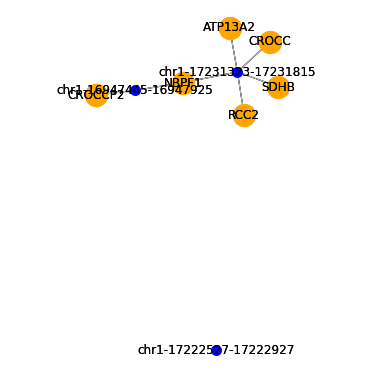

In [ ]:
draw(S_selection[8],True)


In [ ]:
gene_list_GM = list(df_GM['TargetGene'])
enhancer_list_GM = list(df_GM['enhancer'])

gene_list_K562 = list(df_K562['TargetGene'])
enhancer_list_K562 = list(df_K562['enhancer'])

gene_list_intersection = [gene for gene in list(S_selection[8].nodes()) if 'chr' not in gene]
enhancer_list_intersection = [enhancer for enhancer in list(S_selection[8].nodes()) if 'chr' in enhancer]

Ci-dessous on voit que Pole2, LRR1 et RPS29 ne sont pas en commun dans les deux tissus, mais ont un des enhancers communs. Ils sont donc separes. 

In [ ]:
df_GM.loc[(df_GM['TargetGene'].isin(gene_list_intersection)) &
          (df_GM['enhancer'].isin(enhancer_list_intersection))]

,chr,start,end,TargetGene,activity,hic_contact,ABC_Score,Tissu,enhancer
456,chr1,17230631,17232160,NBPF1,28.4784,12.6076,0.0867,df_GM,chr1-17231323-17231815
457,chr1,17221944,17223622,NBPF1,8.8388,13.9849,0.0299,df_GM,chr1-17222527-17222927
458,chr1,16947445,16948230,NBPF1,2.1848,100.0000,0.0528,df_GM,chr1-16947445-16947925
459,chr1,17230631,17232160,CROCCP2,28.4784,13.4535,0.0776,df_GM,chr1-17231323-17231815
460,chr1,17221944,17223622,CROCCP2,8.8388,20.9137,0.0375,df_GM,chr1-17222527-17222927
461,chr1,16947445,16948230,CROCCP2,2.1848,55.9358,0.0248,df_GM,chr1-16947445-16947925
464,chr1,17230631,17232160,CROCC,28.4784,19.6181,0.3457,df_GM,chr1-17231323-17231815
465,chr1,17221944,17223622,CROCC,8.8388,9.3730,0.0513,df_GM,chr1-17222527-17222927
467,chr1,17230631,17232160,ATP13A2,28.4784,8.8369,0.1191,df_GM,chr1-17231323-17231815
472,chr1,17230631,17232160,SDHB,28.4784,5.5177,0.0665,df_GM,chr1-17231323-17231815


In [ ]:
df_K562.loc[(df_K562['TargetGene'].isin(gene_list_intersection)) &
          (df_K562['enhancer'].isin(enhancer_list_intersection))]

,chr,start,end,TargetGene,activity,hic_contact,ABC_Score,Tissu,enhancer
37391,chr1,16947425,16947925,NBPF1,5.7123,100.0000,0.0590,df_K562,chr1-16947445-16947925
37395,chr1,17222465,17223645,NBPF1,13.1158,23.1675,0.0314,df_K562,chr1-17222527-17222927
37396,chr1,17229405,17232125,NBPF1,54.9890,15.3287,0.0871,df_K562,chr1-17231323-17231815
37399,chr1,16947425,16947925,CROCCP2,5.7123,56.0621,0.0430,df_K562,chr1-16947445-16947925
37401,chr1,17222465,17223645,CROCCP2,13.1158,17.5469,0.0309,df_K562,chr1-17222527-17222927
37402,chr1,17229405,17232125,CROCCP2,54.9890,11.7791,0.0869,df_K562,chr1-17231323-17231815
37405,chr1,17222465,17223645,CROCC,13.1158,18.2091,0.0687,df_K562,chr1-17222527-17222927
37406,chr1,17229405,17232125,CROCC,54.9890,23.1266,0.3659,df_K562,chr1-17231323-17231815
37410,chr1,17229405,17232125,ATP13A2,54.9890,7.7265,0.1437,df_K562,chr1-17231323-17231815
37413,chr1,17222465,17223645,SDHB,13.1158,6.5379,0.0248,df_K562,chr1-17222527-17222927


Solution: remove les nodes isoles:

In [ ]:
S_selection[8].remove_nodes_from(list(nx.isolates(S_selection[8])))

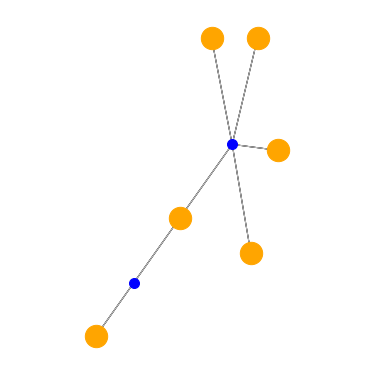

In [ ]:
draw(S_selection[8])

##Developing

In [ ]:
for s in S:
  s.remove_nodes_from(list(nx.isolates(s)))


In [ ]:
S_selection = [s for s in S if (len(s.nodes)) > 3]

In [ ]:
len(S_selection)

429

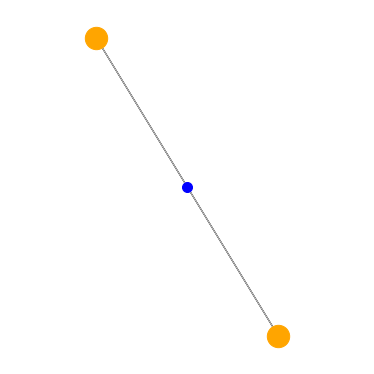

In [ ]:
draw(S_selection[7])

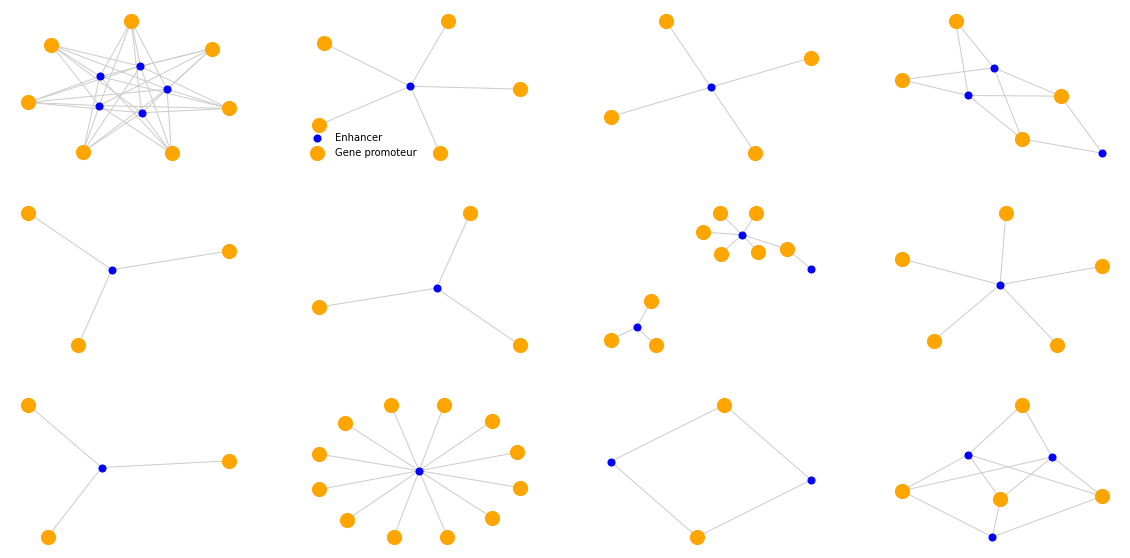

In [ ]:
draw_multiple(S_selection,12)
plt.savefig('crh-final.png', transparent=True)

In [ ]:
test = [len(c) for c in sorted(nx.connected_components(g_intersection), key=len, reverse=True)]
max(test)

15

In [ ]:
S_cleaned = [s for s in S if (len(s.nodes))>1]
None

In [ ]:
def nintersection (graph1,graph2):
  g_intersection = nx.intersection(graph1,graph2)
  S = [G.subgraph(c).copy() for c in nx.connected_components(g_intersection)]
  S = [s for s in S if (len(s.nodes))>1]
  for s in S:
    s.remove_nodes_from(list(nx.isolates(s)))
  return S

In [ ]:
def nintersection (graph1,graph2):
  g_intersection = nx.intersection(graph1,graph2)
  return g_intersection

def subgraph_cleaning(G):
  S = [G.subgraph(c).copy() for c in nx.connected_components(g_intersection)]
  S = [s for s in S if (len(s.nodes))>1]
  for s in S:
    s.remove_nodes_from(list(nx.isolates(s)))
  return S

In [ ]:
NAME_DF

{'df_GM': 0,
 'df_K562': 1,
 'df_LNCAP': 2,
 'df_NCCIT': 3,
 'df_liver': 4,
 'df_mESC': 5}

In [ ]:
G_GM_K562 = nx.intersection(LS_GRAPH[0],LS_GRAPH[1])
G_LNCAP_NNCIT = nx.intersection(LS_GRAPH[2],LS_GRAPH[3])
G_GM_K562_liver = nx.intersection(G_GM_K562,LS_GRAPH[4])
G_TOT= nx.intersection(G_GM_K562_liver,G_LNCAP_NNCIT)

S_GM_K562 = subgraph_cleaning(G_GM_K562)
S_LNCAP_NNCIT = subgraph_cleaning(G_LNCAP_NNCIT)
S_GM_K562_liver = subgraph_cleaning(G_GM_K562_liver)
S_TOT= subgraph_cleaning(G_TOT)


In [ ]:
len_S_GM_K562 = [len(s) for s in S_GM_K562]
len_TOT = [len(s) for s in S_TOT]

In [ ]:
range(min_val,max_val)

NameError: ignored

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,7))
sns.set_style("darkgrid")

min_val = min(len_S_GM_K562)
max_val = max(len_S_GM_K562)
val_width = max_val - min_val
n_bins = max_val - min_val
bin_width = val_width/n_bins
ticks = list(range(min_val,max_val+1))
sns.histplot(len_S_GM_K562, bins = n_bins, binrange=(2, 15), discrete = True,ax=axs[0])

axs[0].set(
    title='Number of CRH in common in cells type K562 and GM',
    xticks = ticks)

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(12,4))
sns.set_style("darkgrid")

min_val = 2
max_val = max(len_TOT)
val_width = max_val - min_val
n_bins = max_val - min_val
bin_width = val_width/n_bins
ticks = list(range(min_val,max_val+1))
graph = sns.histplot(len_TOT, bins = n_bins, binrange=(2, 13), discrete = True)
graph.set_xticks(ticks)
graph.set_title('CRHs shared by the five cell types, categorize by size')
graph.set_xlabel("Number of nodes")
#axs[0].set(
#    title='Number of CRH in common in all five cell types',
#    xticks = ticks)
plt.savefig('CRH_graphique.png', transparent=False)

In [ ]:
len(S_TOT)

In [ ]:
sns.histplot(len_TOT)

In [ ]:
test = [s for s in S_GM_K562 if len(s)>8]
test2 = [s for s in S_TOT if len(s)>12]

In [ ]:
test2

In [ ]:
test2 = [s for s in S_TOT if len(s)==13]

In [ ]:
draw(test2[0], True)
plt.savefig('demo.png', transparent=True)

In [ ]:
#G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(test2, k = 0.8,iterations=100)

# Create a 2x2 subplot
fig, all_axes = plt.subplots(2, 2)
ax = all_axes.flat

nx.draw(test2[0], pos, ax=ax[0], font_size=8)
nx.draw(test2[1], pos, ax=ax[1], node_size=0, with_labels=False)
nx.draw(
    test2[1],
    pos,
    ax=ax[2]
)
nx.draw(
    test2[3],
    pos,
    ax=ax[3]
)

# Set margins for the axes so that nodes aren't clipped
for a in ax:
    a.margins(0.10)
fig.tight_layout()
plt.show()